In [1]:
import pandas as pd
df = pd.read_csv("/content/amazon.csv")

In [ ]:
df

Data Cleansing and Peparation

In [3]:
# check the number of rows and columns
df.shape

(1465, 16)

In [ ]:
# Check for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.rating_count.isnull()]


In [ ]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

In [6]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [7]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [8]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100


In [9]:
# The rating column has a value with an incorrect character, so we will exclude
# the row to obtain a clean dataset.
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")

Total de linhas com '|' na coluna 'rating': 1
Total de linhas com '|' na coluna 'rating': 0


In [12]:
df.loc[:, 'rating'] = df['rating'].replace({',': ''}, regex=True).astype(float)
df.loc[:, 'rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)

<ipython-input-12-f95e39fce211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rating'] = df['rating'].replace({',': ''}, regex=True).astype(float)
<ipython-input-12-f95e39fce211>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)


In [13]:
print(check_data_types(df))

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


Adding another column to our database that could provide valuable insights: "**weighted_rating"**. This column is designed to factor in not just the average rating but also the quantity of ratings received for a product. By incorporating the number of raters, it offers a more nuanced perspective, giving greater importance to products with both high average ratings and a substantial number of raters. This method allows us to discern products with widespread customer satisfaction and abundant positive feedback from those with high average ratings but limited raters.

In [ ]:
# Creating the column "rating_weighted"
df['rating_weighted'] = df['rating'] * df['rating_count']

In [ ]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [16]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_weighted',
       'sub_category', 'main_category'],
      dtype='object')

In [17]:
len(df)

1462

In [18]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_weighted,sub_category,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,USBCables,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,175976.0,USBCables,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,30919.2,USBCables,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,396324.6,USBCables,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,71001.0,USBCables,Computers&Accessories


**Exploratory Data Analysis and Visualization**:In this phase, we'll conduct exploratory data analysis to gain insights into our dataset. We'll start by examining how our products are spread across different categories using a bar plot. Then, we'll delve into the distribution of customer ratings with a histogram. After that, we'll explore customer reviews by generating word clouds or frequency tables to highlight the most frequently used words. Lastly, we'll conduct statistical analysis to uncover any correlations between various features, such as investigating the relationship between product price and customer rating.

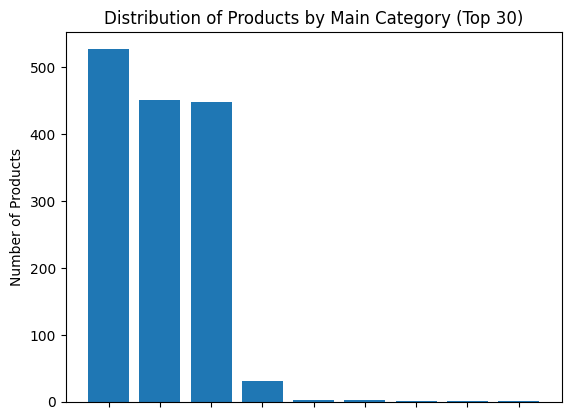

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [19]:
import matplotlib.pyplot as plt

#3.1
# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 main categories
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

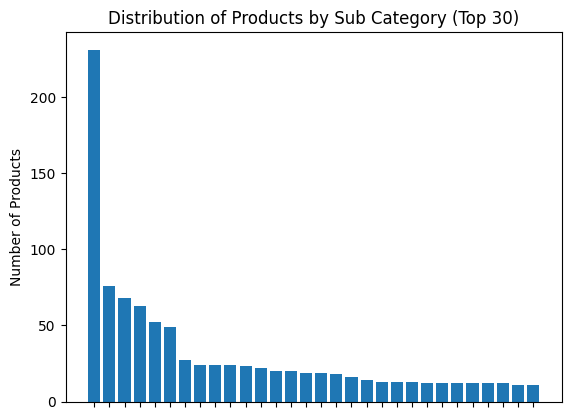

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 231
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

In [20]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 sub categories
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))



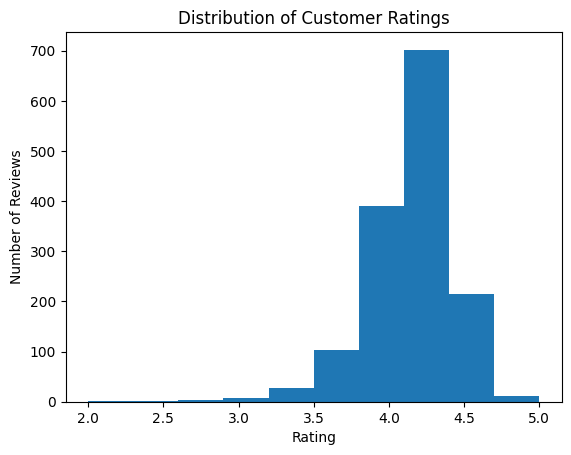

  Cluster  Number of Reviews
4     0-1                  0
3     1-2                  1
2     2-3                  8
1     3-4                525
0     4-5                928


<ipython-input-21-7288c8b3915f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])


In [21]:
# 3.2 Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

# Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().reset_index().sort_values('index').rename(columns={'index': 'Cluster', 'cluster': 'Number of Reviews'})
print(table)


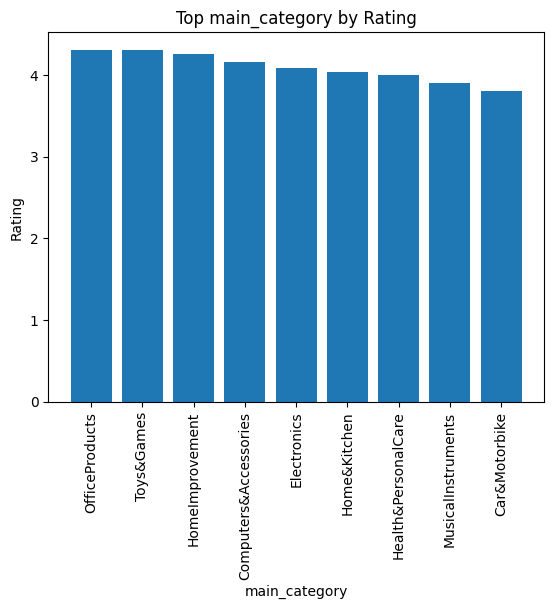

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [22]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

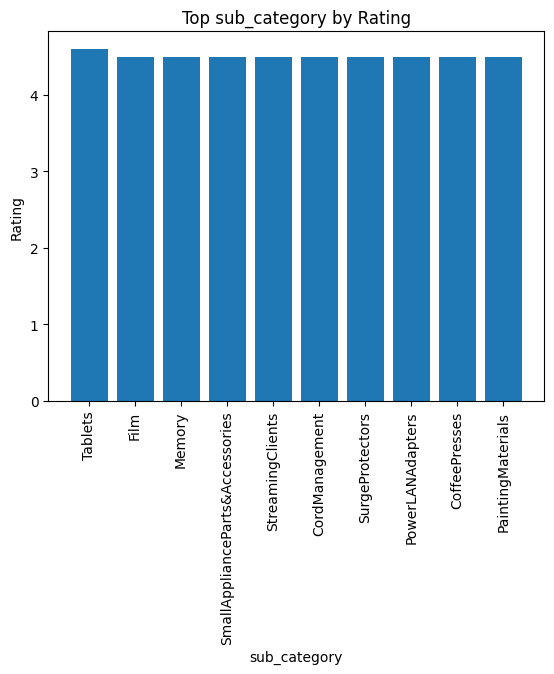

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [23]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

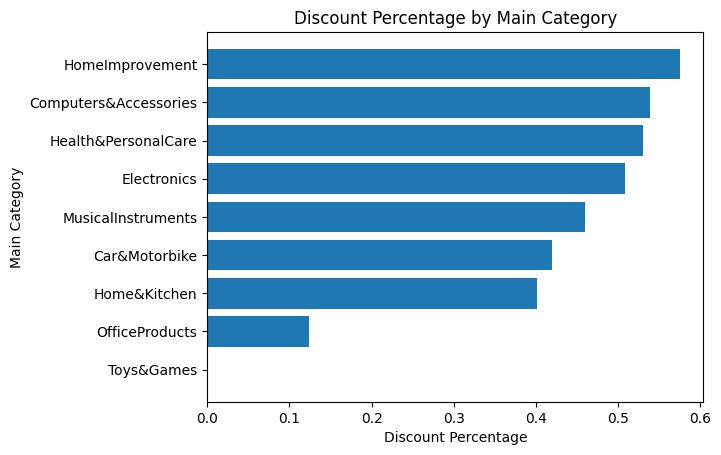

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401745
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.539202
8        HomeImprovement                  0.575000


In [24]:
# sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

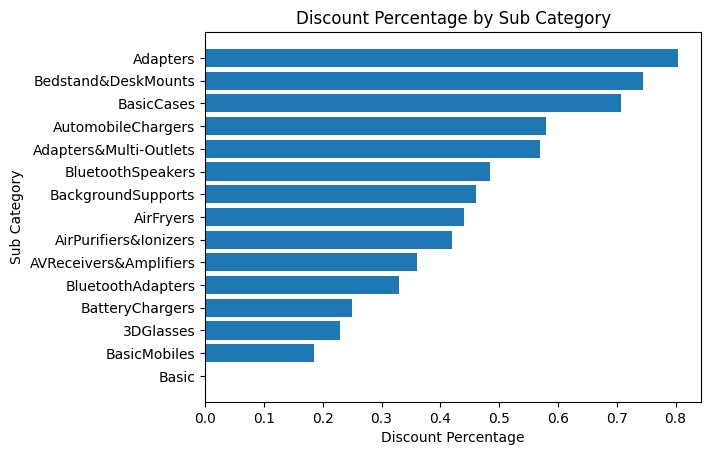

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.185556
2                3DGlasses                  0.230000
3          BatteryChargers                  0.250000
4        BluetoothAdapters                  0.330000
5   AVReceivers&Amplifiers                  0.360000
6    AirPurifiers&Ionizers                  0.420000
7                AirFryers                  0.440000
8       BackgroundSupports                  0.460000
9        BluetoothSpeakers                  0.485000
10  Adapters&Multi-Outlets                  0.570000
11      AutomobileChargers                  0.580000
12              BasicCases                  0.707500
13     Bedstand&DeskMounts                  0.745000
14                Adapters                  0.803333


In [25]:
# sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)


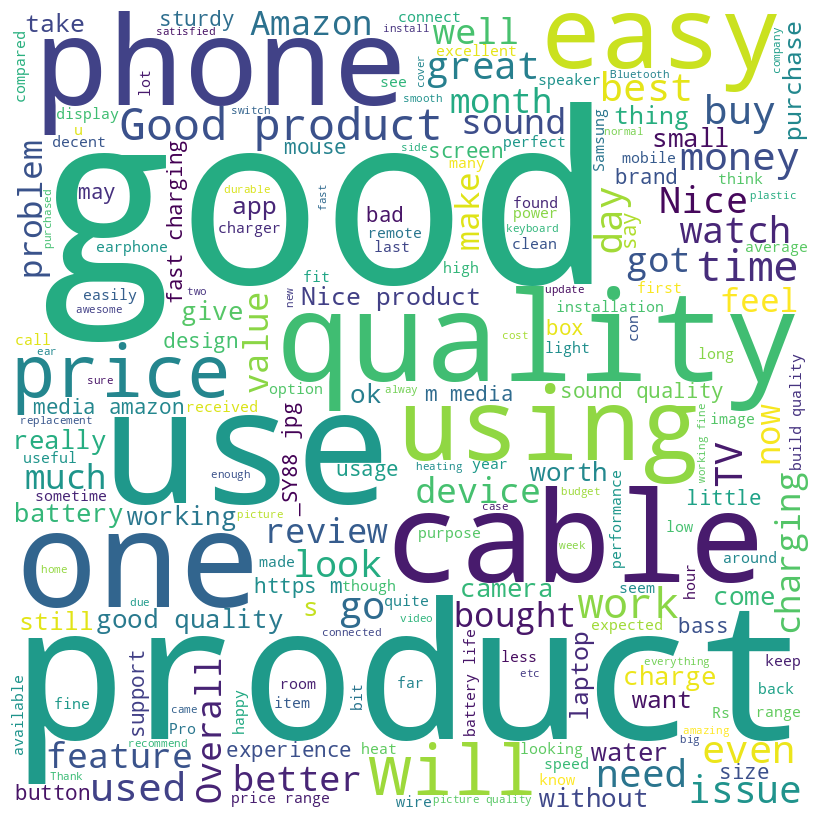

In [26]:
from wordcloud import WordCloud

# 3.3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

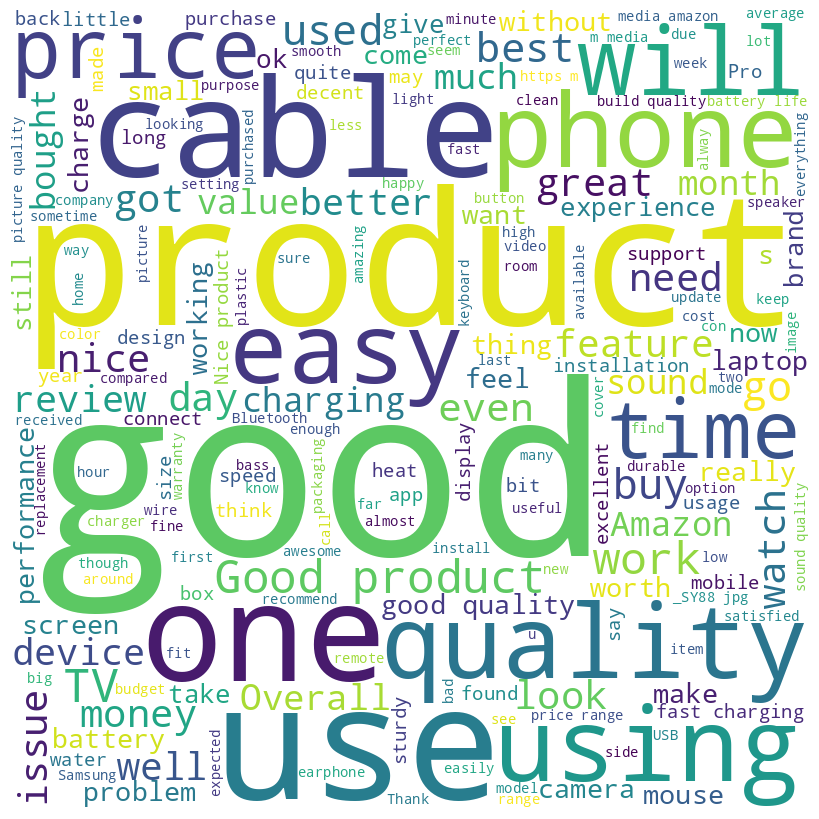

In [27]:
# Filter the dataframe to include only products with a rating lower than 2
low_rating_df = df[df['rating'] > 4.0]

# Create a string of all the reviews for these products
reviews_text = ' '.join(low_rating_df['review_content'].dropna().values)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
#Perform statistical analysis to identify any correlations between different features, such as the relationship between product price and customer rating.
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)


                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.027304     -0.036215             0.011294   
rating_weighted             -0.027039     -0.035959             0.010701   

                       rating  rating_count  rating_weighted  
discounted_price     0.121132     -0.027304        -0.027039  
actual_price         0.122467     -0.036215        -0.035959  
discount_percentage -0.155679      0.011294         0.010701  
rating               1.000000      0.102235         0.115217  
rating_count         0.102235      1.000000         0.999061  
rating_weighted      0.115217      0.999061         1.000000  


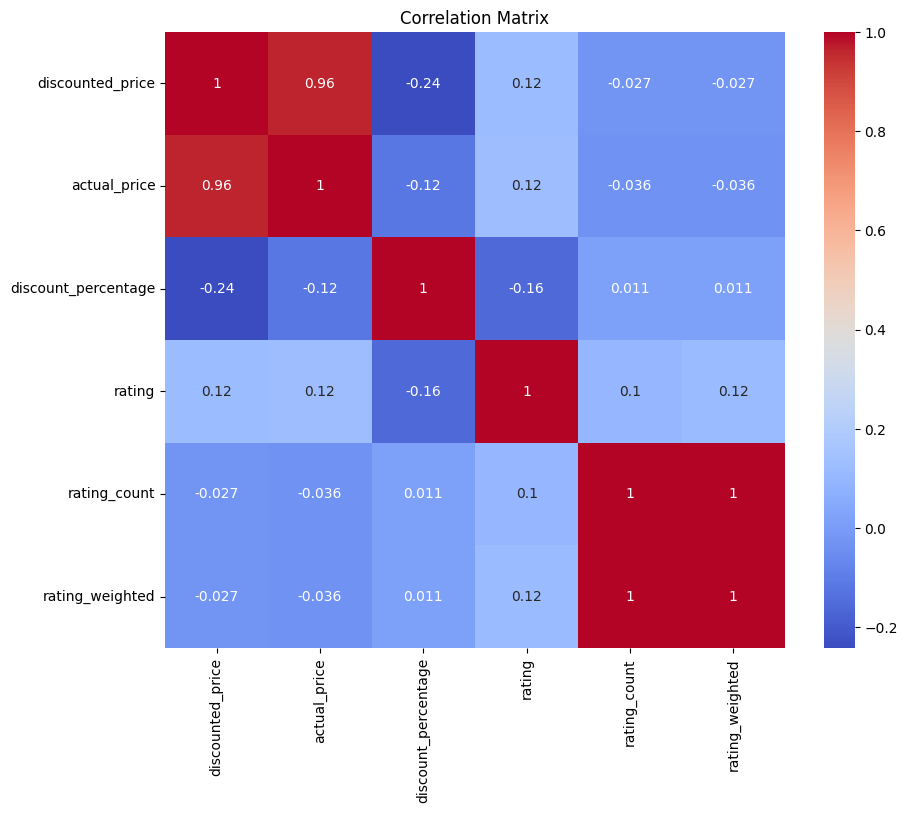

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**RECOMMENDATION SYSTEM**our mission is to enhance users' shopping experiences by helping them discover products they'll love. To accomplish this, I'm developing a recommendation system using an Amazon dataset comprising 1462 rows and various columns like 'product_name', 'category', 'discounted_price', 'actual_price', and more. This system will offer personalized recommendations tailored to each user's interests and past interactions with our platform.

Upon logging in, users will receive suggestions based on their browsing and purchase history, ensuring they encounter new and relevant products aligned with their preferences.


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': df['user_id_encoded'].value_counts().index, 'Frequency': df['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)


      User ID  Frequency
0        1045         10
1         622          8
2         673          8
3         253          7
4          87          7
...       ...        ...
1186      505          1
1187       11          1
1188      897          1
1189      369          1
1190      432          1

[1191 rows x 2 columns]
1045


<ipython-input-31-49a21bcf0165>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id_encoded'] = le.fit_transform(df['user_id'])


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])

    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [33]:
recommend_products(df, 893)


<ipython-input-32-87a38ccf0c35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string


,Id Encoded,recommended product,score recommendation
0,893,"FYA Handheld Vacuum Cleaner Cordless, Wireless...",1.000000
1,893,Eureka Forbes Active Clean 700 Watts Powerful ...,0.347227
2,893,AMERICAN MICRONIC- Imported Wet & Dry Vacuum C...,0.317435
3,893,"INALSA Upright Vacuum Cleaner, 2-in-1,Handheld...",0.310397
4,893,INALSA Vaccum Cleaner Handheld 800W High Power...,0.298666
